In [2]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('/Users/thanaparleelasathapornkun/Library/Mobile Documents/com~apple~CloudDocs/Term2/python_working/Mini_Project_python_working/fake_transactional_data_24.csv', encoding='utf-8')
df = df.rename(columns={"from_totally_fake_account": "AccountNumber", "monopoly_money_amount": "MoneyTransferAmount", "to_randomly_generated_account": "TransferredLocationAccount", "not_happened_yet_date": "TransactionDate"})
# from_totally_fake_account  = AccountNumber
# monopoly_money_amount = MoneyTransferAmount
# to_randomly_generated_account = TransferredLocationAccount
# not_happened_yet_date = TransactionDate
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format="%d/%m/%Y").dt.date
df = df.sort_values(by=['TransactionDate'])
print(df.head())



       AccountNumber  MoneyTransferAmount TransferredLocationAccount  \
0            10371.0                 4.00                     CINEMA   
13385        98994.0                 2.65                COFFEE_SHOP   
13384        98994.0                 2.20        A_LOCAL_COFFEE_SHOP   
13383        34189.0                14.50                        BAR   
13382        86417.0                 4.35                COFFEE_SHOP   

      TransactionDate  
0          2025-01-01  
13385      2025-01-01  
13384      2025-01-01  
13383      2025-01-01  
13382      2025-01-01  


In [12]:
from matplotlib.ticker import FuncFormatter
def format_y_axis(value, _):
    # Convert value to desired unit
    new_value = value / 1000  # Example: Convert to kilo units
    return f"{new_value:.0f}K"  # Format the label with 'K' for kilo units


#### C Recipients
#### Objective: Understand the revenue patterns of the bank’s recipient customers by frequency, amount, destination and time


##### **1. Calculate Number of Recipients**

In [82]:
print("Total Number of Recipients: "+str(len(df['TransferredLocationAccount'].unique())) )

Total Number of Recipients: 14300



##### 2. Calculate **total payments received** by each Recipient - show the **distribution, mean, interquartile range and 5% and 95% points** for this data to categorise how the total receipts of Recepients is distributed

To categorise how the Total receipts of Recepients is distributed:
Mean payment received: 13053.30318111888


/Users/thanaparleelasathapornkun/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


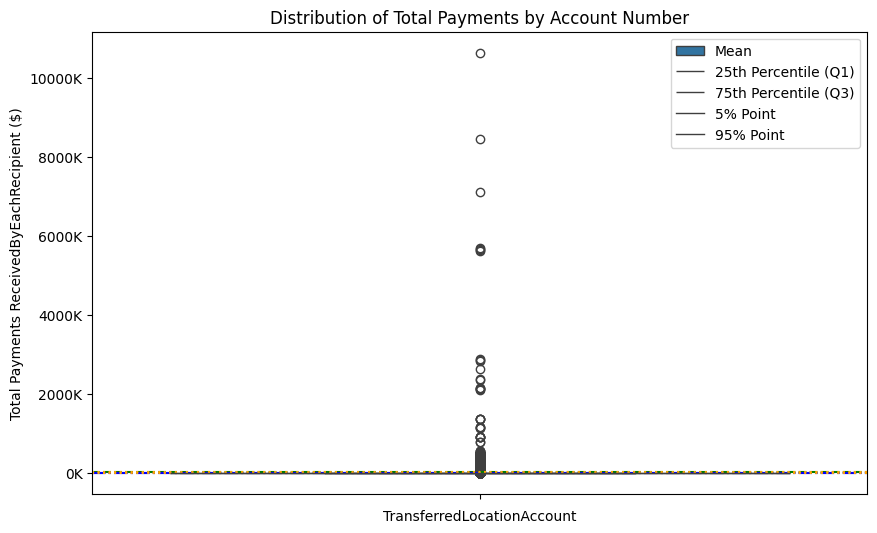

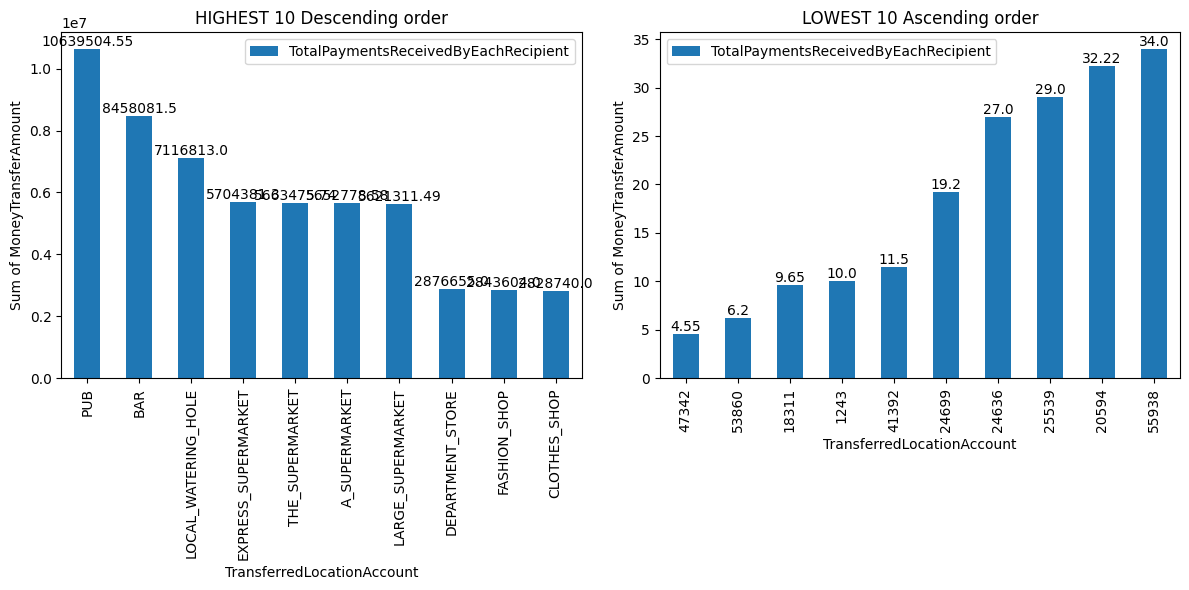

      TransferredLocationAccount  TotalPaymentsReceivedByEachRecipient
13387                        PUB                           10639504.55
13383                        BAR                            8458081.50
13378        LOCAL_WATERING_HOLE                            7116813.00
18442        EXPRESS_SUPERMARKET                            5704381.30
17615            THE_SUPERMARKET                            5663475.74
        TransferredLocationAccount  TotalPaymentsReceivedByEachRecipient
2601081                      47342                                  4.55
1979670                      53860                                  6.20
2396917                      18311                                  9.65
4519961                       1243                                 10.00
1213702                      41392                                 11.50


In [20]:
import matplotlib.pyplot as plt
import numpy as np
print("To categorise how the Total receipts of Recepients is distributed:")
df['TotalPaymentsReceivedByEachRecipient'] = df.groupby(['TransferredLocationAccount'])['MoneyTransferAmount'].transform('sum')

# #Calculates the total payments received by each recipient within each group of TransferredLocationAccount.
df_TotalPaymentsReceivedByEachRecipient = df[['TransferredLocationAccount', 'TotalPaymentsReceivedByEachRecipient']].drop_duplicates()

# df_TotalPaymentsReceivedByEachRecipient = df.groupby('TransferredLocationAccount')['MoneyTransferAmount'].sum().reset_index()

MeanTotalPaymentReceivedByEachRecipient = df_TotalPaymentsReceivedByEachRecipient['TotalPaymentsReceivedByEachRecipient'].mean()
print("Mean payment received: "+str(MeanTotalPaymentReceivedByEachRecipient))
# Calculate the distribution statistics
distribution_stats = df_TotalPaymentsReceivedByEachRecipient['TotalPaymentsReceivedByEachRecipient'].describe(percentiles=[.05, .25, .5, .75, .95])

iqr = distribution_stats['75%'] - distribution_stats['25%']

# Extracting the 5% and 95% points
five_percent_point = distribution_stats['5%']
ninety_five_percent_point = distribution_stats['95%']

fig0, axs0 = plt.subplots(1, 1, figsize=(10, 6))

# Boxplot to show the distribution of payments
sns.boxplot(data=df_TotalPaymentsReceivedByEachRecipient, y='TotalPaymentsReceivedByEachRecipient')
plt.title('Distribution of Total Payments by Account Number')
plt.ylabel('Total Payments ReceivedByEachRecipient ($)')
plt.xlabel('TransferredLocationAccount')

# Add individual points to show actual payments
#sns.stripplot(data=total_payments_by_account, y='MoneyTransferAmount', color='red', jitter=0.1, size=8)

# Show the mean and IQR explicitly on the plot
plt.axhline(distribution_stats['mean'], color='green', linestyle='--')
plt.axhline(distribution_stats['25%'], color='blue', linestyle='-.')
plt.axhline(distribution_stats['75%'], color='blue', linestyle='-.')

# Annotate the 5% and 95% points on the plot
plt.axhline(five_percent_point, color='orange', linestyle=':')
plt.axhline(ninety_five_percent_point, color='orange', linestyle=':')

axs0.yaxis.set_major_formatter(FuncFormatter(format_y_axis))
# Adding legend for mean and IQR lines
plt.legend(['Mean', '25th Percentile (Q1)', '75th Percentile (Q3)', '5% Point', '95% Point'], loc='upper right')

# Show the plot
plt.show()

#-------

#Show TOP 10 detail
# print("Checking TOP 10 Descending order: ")
df_Transferred_numeric_DESC = df_TotalPaymentsReceivedByEachRecipient.sort_values(by=['TotalPaymentsReceivedByEachRecipient'],ascending=False)
temp_DESC = df_Transferred_numeric_DESC.head(10)
# print(df_Transferred_numeric_DESC.head(10))
# print("Checking TOP 10 Ascending order: ")
df_Transferred_numeric_ASCE = df_TotalPaymentsReceivedByEachRecipient.sort_values(by=['TotalPaymentsReceivedByEachRecipient'])
temp_ASCE = df_Transferred_numeric_ASCE.head(10)
# print(df_Transferred_numeric_ASCE.head(10))

# Create a figure with 2 subplots arranged in 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Plot on the first subplot
temp_DESC.plot(x='TransferredLocationAccount',y='TotalPaymentsReceivedByEachRecipient',kind='bar', ax=axs[0])
# Add count labels to the bars
for i, bar in enumerate(axs[0].patches):
    axs[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), temp_DESC['TotalPaymentsReceivedByEachRecipient'].iloc[i], ha='center', va='bottom')
axs[0].set_xlabel('TransferredLocationAccount')
axs[0].set_ylabel('Sum of MoneyTransferAmount')
axs[0].set_title('HIGHEST 10 Descending order')
# Plot on the second subplot
# Assuming temp_ASC is another DataFrame you want to plot
temp_ASCE.plot(x='TransferredLocationAccount',y='TotalPaymentsReceivedByEachRecipient',kind='bar', ax=axs[1])
# Add count labels to the bars
for i, bar in enumerate(axs[1].patches):
    axs[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), temp_ASCE['TotalPaymentsReceivedByEachRecipient'].iloc[i], ha='center', va='bottom')
axs[1].set_xlabel('TransferredLocationAccount')
axs[1].set_ylabel('Sum of MoneyTransferAmount')
axs[1].set_title('LOWEST 10 Ascending order')
# Adjust layout to prevent overlapping titles
plt.tight_layout()
# Show the plot
plt.show()
df_TotalPaymentsReceivedByEachRecipient, distribution_stats, iqr, five_percent_point, ninety_five_percent_point
print(temp_DESC.head())
print(temp_ASCE.head())


##### 3. Calculate **number of payments** received by each Recipient - show distribution mean etc for this statistic

Total number of payments: 10148280
Unique Account/location of number of payments: 14300
       TransferredLocationAccount  \
13387                         PUB   
13383                         BAR   
13378         LOCAL_WATERING_HOLE   
13385                 COFFEE_SHOP   
13373  TOTALLY_A_REAL_COFFEE_SHOP   

       SummationOfTotalNumberOfPaymentsByEachRecipient  
13387                                           834380  
13383                                           770414  
13378                                           649043  
13385                                           476099  
13373                                           476064  


/Users/thanaparleelasathapornkun/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


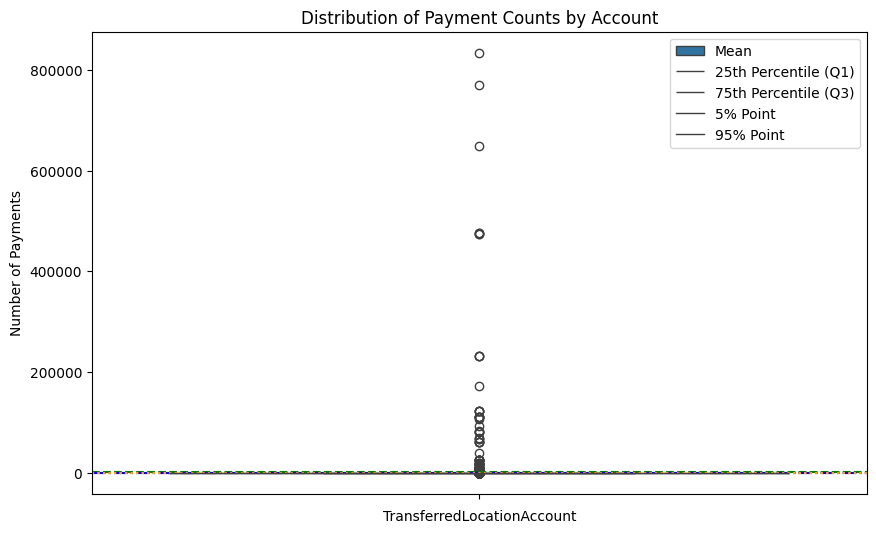

In [22]:

df['SummationOfTotalNumberOfPaymentsByEachRecipient'] = df.groupby(['TransferredLocationAccount'])['MoneyTransferAmount'].transform('count')
print("Total number of payments: "+str(len(df['SummationOfTotalNumberOfPaymentsByEachRecipient'])))
# Total number of datasets: 10148280


df_TotalNumberOfPaymentsByEachRecipient = df[['TransferredLocationAccount', 'SummationOfTotalNumberOfPaymentsByEachRecipient']].drop_duplicates()
df_TotalNumberOfPaymentsByEachRecipient = df_TotalNumberOfPaymentsByEachRecipient.sort_values(by=['SummationOfTotalNumberOfPaymentsByEachRecipient'],ascending=False)
print("Unique Account/location of number of payments: "+str(len(df_TotalNumberOfPaymentsByEachRecipient['TransferredLocationAccount'])))
print(df_TotalNumberOfPaymentsByEachRecipient.head())


# Calculate the distribution statistics
count_distribution_stats = df_TotalNumberOfPaymentsByEachRecipient['SummationOfTotalNumberOfPaymentsByEachRecipient'].describe(percentiles=[.05, .25, .5, .75, .95])

# Extracting the interquartile range
iqr = count_distribution_stats['75%'] - count_distribution_stats['25%']

# Extracting the 5% and 95% points
five_percent_point = count_distribution_stats['5%']
ninety_five_percent_point = count_distribution_stats['95%']

# Setting up the matplotlib figure for the number of payments by account
plt.figure(figsize=(10, 6))

# Create a boxplot to show the distribution of payment counts by account
sns.boxplot(data=df_TotalNumberOfPaymentsByEachRecipient, y='SummationOfTotalNumberOfPaymentsByEachRecipient')
plt.title('Distribution of Payment Counts by Account')
plt.ylabel('Number of Payments')
plt.xlabel('TransferredLocationAccount')

# Add individual points to show actual number of payments
#sns.stripplot(data=payments_count_by_account, y='NumberOfPayments', color='red', jitter=0.1, size=8)

# Show the mean and IQR explicitly on the plot
plt.axhline(count_distribution_stats['mean'], color='green', linestyle='--')
plt.axhline(count_distribution_stats['25%'], color='blue', linestyle='-.')
plt.axhline(count_distribution_stats['75%'], color='blue', linestyle='-.')

# Annotate the 5% and 95% points on the plot
plt.axhline(five_percent_point, color='orange', linestyle=':')
plt.axhline(ninety_five_percent_point, color='orange', linestyle=':')

# Adding legend for mean and IQR lines
plt.legend(['Mean', '25th Percentile (Q1)', '75th Percentile (Q3)', '5% Point', '95% Point'], loc='upper right')

# Show the plot
plt.show()


##### 4. For each Recipient calculate the  **mean payment received** - show distribution etc of this statistic

In [116]:
MeanNumberOfPaymentReceivedEachRecipient = df_TotalNumberOfPaymentsByEachRecipient['SummationOfTotalNumberOfPaymentsByEachRecipient'].mean()
print("Mean payment received : "+str(MeanNumberOfPaymentReceivedEachRecipient))

Mean payment received : 709.66993006993


##### **5 Plot mean spend vs total spend AND mean spend vs number of payments**

Mean spend vs total spend: 
Min: 4.55  Max: 10639504.55
Mean spend vs number of payments: 
Min: 1  Max: 834380


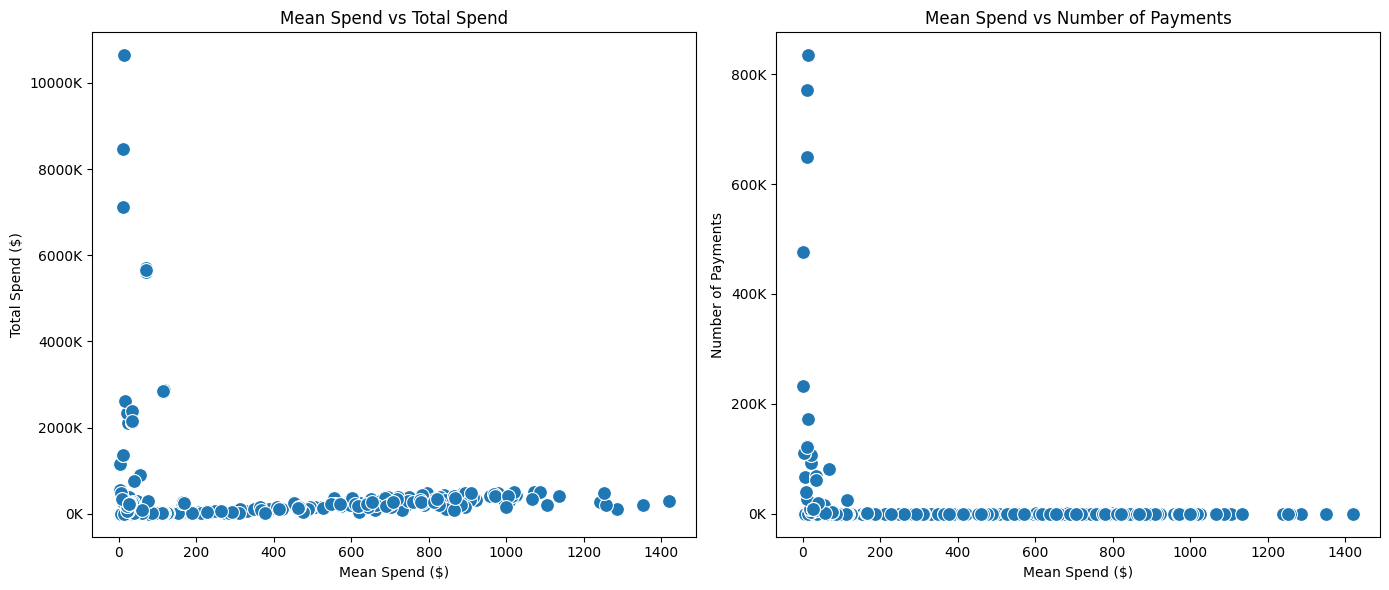

In [28]:
from matplotlib.ticker import FuncFormatter
print("Mean spend vs total spend: ")
print("Min: "+str(min(df_TotalPaymentsReceivedByEachRecipient['TotalPaymentsReceivedByEachRecipient']))+"  Max: "+str(max(df_TotalPaymentsReceivedByEachRecipient['TotalPaymentsReceivedByEachRecipient'])))
print("Mean spend vs number of payments: ")
print("Min: "+str(min(df_TotalNumberOfPaymentsByEachRecipient['SummationOfTotalNumberOfPaymentsByEachRecipient']))+"  Max: "+str(max(df_TotalNumberOfPaymentsByEachRecipient['SummationOfTotalNumberOfPaymentsByEachRecipient'])))

# Calculating the mean payment for each transferredAccountLocation
mean_payments_by_account = df.groupby('TransferredLocationAccount')['MoneyTransferAmount'].mean().reset_index(name='MeanPayment')

mean_vs_total = pd.merge(mean_payments_by_account, df_TotalPaymentsReceivedByEachRecipient, on='TransferredLocationAccount')
mean_vs_count = pd.merge(mean_payments_by_account, df_TotalNumberOfPaymentsByEachRecipient, on='TransferredLocationAccount')

# Setting up the matplotlib figure
# plt.figure(figsize=(14, 6))
fig, axs2 = plt.subplots(1, 2, figsize=(14, 6))

# First subplot for Mean Spend vs Total Spend
sns.scatterplot(data=mean_vs_total, x='MeanPayment', y='TotalPaymentsReceivedByEachRecipient', s=100, ax=axs2[0])
axs2[0].set_xlabel('Mean Spend ($)')
axs2[0].set_ylabel('Total Spend ($)')
axs2[0].set_title('Mean Spend vs Total Spend')
axs2[0].yaxis.set_major_formatter(FuncFormatter(format_y_axis))


# Second subplot for Mean Spend vs Number of Payments
sns.scatterplot(data=mean_vs_count, x='MeanPayment', y='SummationOfTotalNumberOfPaymentsByEachRecipient', s=100, ax=axs2[1])
axs2[1].set_xlabel('Mean Spend ($)')
axs2[1].set_ylabel('Number of Payments')
axs2[1].set_title('Mean Spend vs Number of Payments')
axs2[1].yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Show the plot with a tight layout
plt.tight_layout()
plt.show()


##### 6 Calculate **number of Sources for each Recipient** and show distribution etc for this statistic. **Plot Number of Sources per Recipient against mean receipt per Recipient and total receipt per Recipient**

The count of total Source : 8142
Number Of Sources For Each Recipient: 
Min: 1  Max: 8142
Mean of No. of source for each recipient : 34.332867132867136


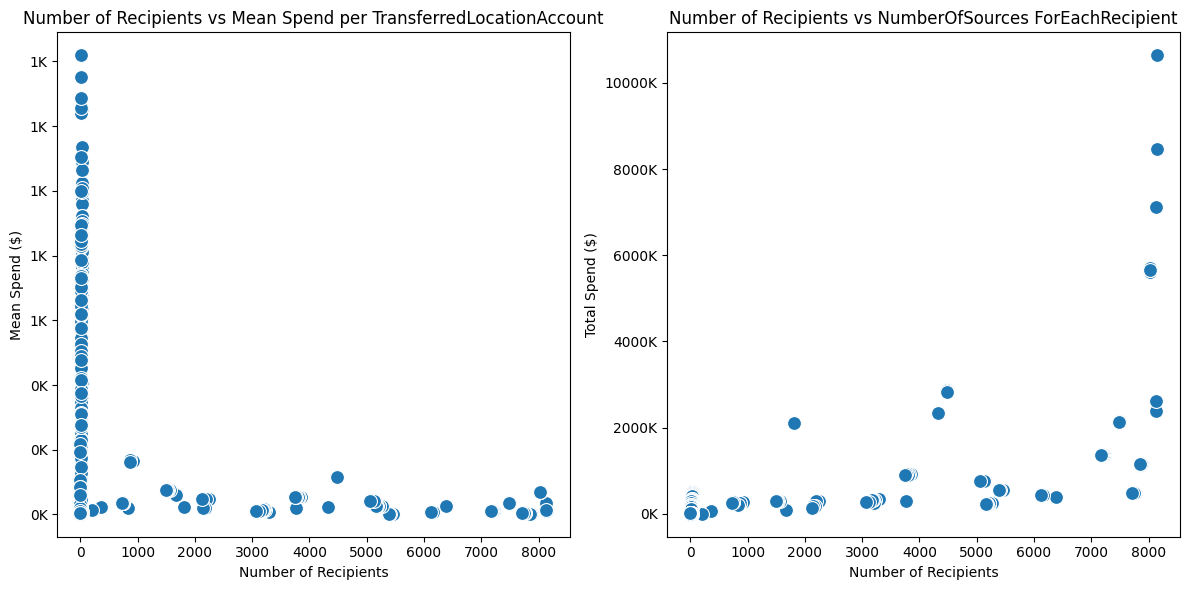

In [32]:
df['NumberOfSourcesForEachRecipient'] = df.groupby(['TransferredLocationAccount'])['AccountNumber'].transform('nunique')
# print("Total number of repeated Sources: "+str(sum(df['NumberOfSourcesForEachRecipient']))) 
df_NumberOfSourcesForEachRecipient = df[['TransferredLocationAccount', 'NumberOfSourcesForEachRecipient']].drop_duplicates()
df_NumberOfSourcesForEachRecipient = df_NumberOfSourcesForEachRecipient.sort_values(by=['NumberOfSourcesForEachRecipient'],ascending=False)
# print(df_NumberOfSourcesForEachRecipient.head(10))

# We need to merge the number of recipients with mean payments and total payments dataframes for plotting
recipients_vs_mean_spend = pd.merge(df_NumberOfSourcesForEachRecipient, mean_payments_by_account, on='TransferredLocationAccount')
recipients_vs_total_spend = pd.merge(df_NumberOfSourcesForEachRecipient, df_TotalPaymentsReceivedByEachRecipient, on='TransferredLocationAccount')


print("The count of total Source : "+str(len(df['AccountNumber'].unique())))
print("Number Of Sources For Each Recipient: ")
print("Min: "+str(min(df_NumberOfSourcesForEachRecipient['NumberOfSourcesForEachRecipient']))+"  Max: "+str(max(df_NumberOfSourcesForEachRecipient['NumberOfSourcesForEachRecipient'])))

MeanNumberOfSourcesForEachRecipient = df_NumberOfSourcesForEachRecipient['NumberOfSourcesForEachRecipient'].mean()
# print(df_NumberOfSourcesForEachRecipient.head())
print("Mean of No. of source for each recipient : "+str(MeanNumberOfSourcesForEachRecipient))

fig, axs3 = plt.subplots(1, 2, figsize=(12, 6))
# Plot on the first subplot
sns.scatterplot(data=recipients_vs_mean_spend, x='NumberOfSourcesForEachRecipient', y='MeanPayment', s=100, ax=axs3[0])
axs3[0].set_xlabel('Number of Recipients')
axs3[0].set_ylabel('Mean Spend ($)')
axs3[0].set_title('Number of Recipients vs Mean Spend per TransferredLocationAccount')
axs3[0].yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Second subplot for Number of Recipients vs Total Spend
plt.subplot(1, 2, 2)
sns.scatterplot(data=recipients_vs_total_spend, x='NumberOfSourcesForEachRecipient', y='TotalPaymentsReceivedByEachRecipient', s=100, ax=axs3[1])
axs3[1].set_xlabel('Number of Recipients')
axs3[1].set_ylabel('Total Spend ($)')
axs3[1].set_title('Number of Recipients vs NumberOfSources ForEachRecipient')
axs3[1].yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Show the plot with a tight layout
plt.tight_layout()
plt.show()




##### 7. Look at **date distribution of payments per Recipient** ie by day of the week, week of the month, month of the year **ie do Recipients have a favourite max spend day/week/month ?**

       TransactionDayOfWeekName  SumMoneyTransferOfDayOfWeekName
66954                       Fri                      35694018.95
108316                      Sat                      35571394.97
147803                      Sun                      35553515.30
0                           Wed                      20103512.82
188954                      Tue                      19979303.02
172230                      Mon                      19916790.94
30795                      Thur                      19843699.49
        TransactionDateWeekOfMonth  SumMoneyTransferOfWeekOfMonth
205889                           2                    44928717.19
399702                           3                    44801176.09
0                                1                    44672993.96
593062                           4                    43163313.61
786775                           5                     9096034.64
         TransactionDateMonthOfYear  SumMoneyTransferOfMonthOfYear
9250719          

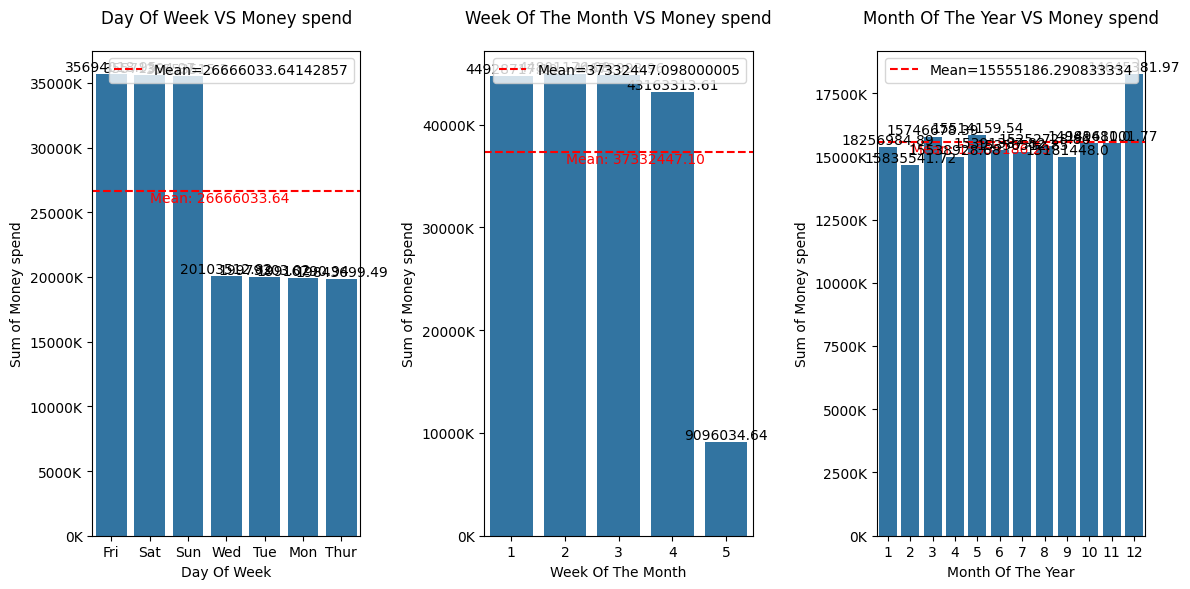

In [34]:
import datetime
#date distribution of payments per Recipient

#day of the week
# Get the day of the week (Monday is 0, Sunday is 6)
import pandas as pd

# Assuming df is your DataFrame and 'TransactionDate' is a datetime column
df['TransactionDateDayOfWeek'] = df['TransactionDate'].apply(lambda x: x.weekday())
# Mapping (e.g., 0 -> 'Monday', 1 -> 'Tuesday', etc.), you can use a dictionary:
day_of_week_names = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thur', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['TransactionDayOfWeekName'] = df['TransactionDateDayOfWeek'].map(day_of_week_names)

#week of the month
# Get the week of the month
df['TransactionDateWeekOfMonth'] = df['TransactionDate'].apply(lambda x: (x.day - 1) // 7 + 1)

#month of the year 
# Get the month of the year
df['TransactionDateMonthOfYear'] = df['TransactionDate'].apply(lambda x: x.month)

# #Processing
df['SumMoneyTransferOfDayOfWeekName'] = df.groupby(['TransactionDayOfWeekName'])['MoneyTransferAmount'].transform('sum')
df_TransactionDayOfWeekNameMoneyTransfer = df[['TransactionDayOfWeekName', 'SumMoneyTransferOfDayOfWeekName']].drop_duplicates()
df_TransactionDayOfWeekNameMoneyTransfer = df_TransactionDayOfWeekNameMoneyTransfer.sort_values(by=['SumMoneyTransferOfDayOfWeekName'],ascending=False)

df['SumMoneyTransferOfWeekOfMonth'] = df.groupby(['TransactionDateWeekOfMonth'])['MoneyTransferAmount'].transform('sum')
df_TransactionDateWeekOfMonthMoneyTransfer = df[['TransactionDateWeekOfMonth', 'SumMoneyTransferOfWeekOfMonth']].drop_duplicates()
df_TransactionDateWeekOfMonthMoneyTransfer = df_TransactionDateWeekOfMonthMoneyTransfer.sort_values(by=['SumMoneyTransferOfWeekOfMonth'],ascending=False)

df['SumMoneyTransferOfMonthOfYear'] = df.groupby(['TransactionDateMonthOfYear'])['MoneyTransferAmount'].transform('sum')
df_TransactionDayOfDateMonthOfYearTransfer = df[['TransactionDateMonthOfYear', 'SumMoneyTransferOfMonthOfYear']].drop_duplicates()
df_TransactionDayOfDateMonthOfYearTransfer = df_TransactionDayOfDateMonthOfYearTransfer.sort_values(by=['SumMoneyTransferOfMonthOfYear'],ascending=False)



print(df_TransactionDayOfWeekNameMoneyTransfer)
print(df_TransactionDateWeekOfMonthMoneyTransfer)
print(df_TransactionDayOfDateMonthOfYearTransfer)

MeanAmountDayOfWeekName = df_TransactionDayOfWeekNameMoneyTransfer['SumMoneyTransferOfDayOfWeekName'].mean()

# Plot Day Of Week
fig, axs4 = plt.subplots(1, 3, figsize=(12, 6))
# Plot on the first subplot
sns.barplot(data=df_TransactionDayOfWeekNameMoneyTransfer, x='TransactionDayOfWeekName', y='SumMoneyTransferOfDayOfWeekName', ax=axs4[0])
# Add marker for mean
axs4[0].axhline(y=MeanAmountDayOfWeekName, color='r', linestyle='--', label='Mean='+str(MeanAmountDayOfWeekName))
# Add text above mean line
axs4[0].text(1.02, MeanAmountDayOfWeekName , f'Mean: {MeanAmountDayOfWeekName:.2f}', color='r', ha='left', va='top')
# Add count labels to the bars
for i, bar in enumerate(axs4[0].patches):
    axs4[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), df_TransactionDayOfWeekNameMoneyTransfer['SumMoneyTransferOfDayOfWeekName'].iloc[i], ha='center', va='bottom')
# Add legend
axs4[0].legend()
axs4[0].set_xlabel('Day Of Week')
axs4[0].set_ylabel('Sum of Money spend')
axs4[0].set_title('Day Of Week VS Money spend', pad=20) 
axs4[0].yaxis.set_major_formatter(FuncFormatter(format_y_axis))

MeanAmountWeekOfMonth = df_TransactionDateWeekOfMonthMoneyTransfer['SumMoneyTransferOfWeekOfMonth'].mean()

# Plot week of the month
sns.barplot(data=df_TransactionDateWeekOfMonthMoneyTransfer, x='TransactionDateWeekOfMonth', y='SumMoneyTransferOfWeekOfMonth', ax=axs4[1])
# Add marker for mean
axs4[1].axhline(y=MeanAmountWeekOfMonth, color='r', linestyle='--', label='Mean='+str(MeanAmountWeekOfMonth))
# Add text above mean line
axs4[1].text(1.02, MeanAmountWeekOfMonth , f'Mean: {MeanAmountWeekOfMonth:.2f}', color='r', ha='left', va='top')# Add count labels to the bars
for i, bar in enumerate(axs4[1].patches):
    axs4[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), df_TransactionDateWeekOfMonthMoneyTransfer['SumMoneyTransferOfWeekOfMonth'].iloc[i], ha='center', va='bottom')
# Add legend
axs4[1].legend()
axs4[1].set_xlabel('Week Of The Month')
axs4[1].set_ylabel('Sum of Money spend')
axs4[1].set_title('Week Of The Month VS Money spend', pad=20) 
axs4[1].yaxis.set_major_formatter(FuncFormatter(format_y_axis))

MeanAmountMonthOfYear = df_TransactionDayOfDateMonthOfYearTransfer['SumMoneyTransferOfMonthOfYear'].mean()

# Plot month of the year 
sns.barplot(data=df_TransactionDayOfDateMonthOfYearTransfer, x='TransactionDateMonthOfYear', y='SumMoneyTransferOfMonthOfYear', ax=axs4[2])
# Add marker for mean
axs4[2].axhline(y=MeanAmountMonthOfYear, color='r', linestyle='--', label='Mean='+str(MeanAmountMonthOfYear))
# Add text above mean line
axs4[2].text(1.02, MeanAmountMonthOfYear , f'Mean: {MeanAmountMonthOfYear:.2f}', color='r', ha='left', va='top')# Add count labels to the bars
for i, bar in enumerate(axs4[2].patches):
    axs4[2].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), df_TransactionDayOfDateMonthOfYearTransfer['SumMoneyTransferOfMonthOfYear'].iloc[i], ha='center', va='bottom')
# Add legend
axs4[2].legend()
axs4[2].set_xlabel('Month Of The Year')
axs4[2].set_ylabel('Sum of Money spend')
axs4[2].set_title('Month Of The Year VS Money spend', pad=20) 
axs4[2].yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adjust layout to prevent overlapping titles
plt.tight_layout()
# Show the plot
plt.show()